\#Image Classification with SIFT Feature and Neural Networks

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog, daisy, SIFT
from PIL import Image
from skimage import exposure

In [ ]:
#Image Classification with SIFT Feature and Neural Networks

## 1. Dataset Preparation

mount google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Extract data

In [ ]:
!unzip /content/drive/MyDrive/Al.zip 

Streaming output truncated to the last 5000 lines.
  inflating: Al/face-detection/venv/Lib/site-packages/numpy/core/tests/data/umath-validation-set-tan.csv  
  inflating: __MACOSX/Al/face-detection/venv/Lib/site-packages/numpy/core/tests/data/._umath-validation-set-tan.csv  
  inflating: Al/face-detection/venv/Lib/site-packages/numpy/core/tests/data/umath-validation-set-exp.csv  
  inflating: __MACOSX/Al/face-detection/venv/Lib/site-packages/numpy/core/tests/data/._umath-validation-set-exp.csv  
  inflating: Al/face-detection/venv/Lib/site-packages/numpy/core/tests/data/astype_copy.pkl  
  inflating: __MACOSX/Al/face-detection/venv/Lib/site-packages/numpy/core/tests/data/._astype_copy.pkl  
  inflating: Al/face-detection/venv/Lib/site-packages/numpy/core/lib/npy-pkg-config/npymath.ini  
  inflating: __MACOSX/Al/face-detection/venv/Lib/site-packages/numpy/core/lib/npy-pkg-config/._npymath.ini  
  inflating: Al/face-detection/venv/Lib/site-packages/numpy/core/lib/npy-pkg-config/mlib.ini 

## Load Image Data

In [ ]:
image_dir = '/content/Al/face-detection/images/gender/'

# Get all .jpg & .png images in the male folder
male_filenames = [os.path.join(image_dir, 'male', filename) for filename in os.listdir(image_dir + 'male') if filename.endswith('.jpg') or filename.endswith('.png')]

# Get all .jpg & .png images in the female folder
female_filenames = [os.path.join(image_dir, 'female', filename) for filename in os.listdir(image_dir + 'female') if filename.endswith('.jpg') or filename.endswith('.png')]

# Get the images using the file names
male_images = [Image.open(filename) for filename in male_filenames]
female_images = [Image.open(filename) for filename in female_filenames]

In [ ]:
# make labels
female_labels = [1 for i in range(len(female_images))]
male_labels = [0 for i in range(len(male_images))]

show image

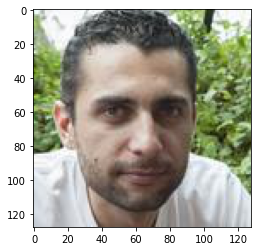

In [ ]:
plt.imshow(male_images[1], cmap='gray')

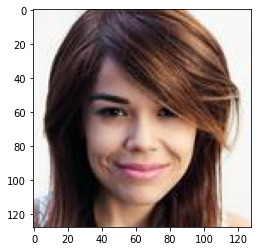

In [ ]:
plt.imshow(female_images[1], cmap='gray')

## Test extract feature from image

### HOG Feature

In [ ]:
feature, hog_img = hog(male_images[0], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True, channel_axis=-1)

In [ ]:
feature.shape

(2304,)

<BarContainer object of 2304 artists>

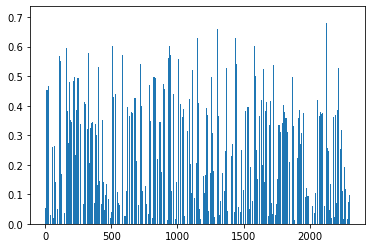

In [ ]:
plt.bar(list(range(feature.shape[0])), feature)

In [ ]:
feature, hog_img = hog(female_images[0], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True, channel_axis=-1)

In [ ]:
feature.shape

(2304,)

<BarContainer object of 2304 artists>

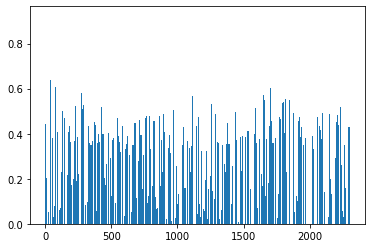

In [ ]:
plt.bar(list(range(feature.shape[0])), feature)

### DAISY Feature

In [ ]:
# Extract the DAISY descriptor
feature, daisy_image = daisy(male_images[0].convert('L'), step=180, radius=58, rings=2, histograms=6, orientations=8, visualize=True)

In [ ]:
feature = np.array(feature).flatten()
feature.shape

(104,)

<BarContainer object of 104 artists>

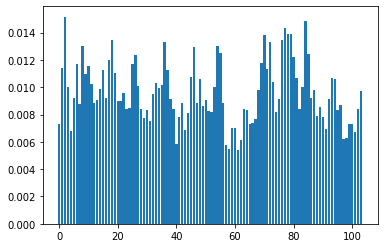

In [ ]:
plt.bar(list(range(feature.shape[0])), feature)

In [ ]:
feature, daisy_img = daisy(female_images[0].convert('L'), step=180, radius=58, rings=2, histograms=6, orientations=8, visualize=True)

In [ ]:
feature = np.array(feature).flatten()
feature.shape

(104,)

<BarContainer object of 104 artists>

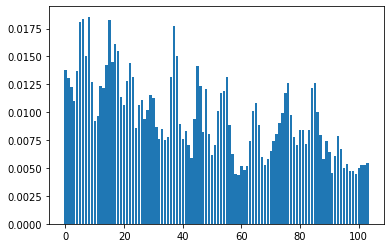

In [ ]:
plt.bar(list(range(feature.shape[0])), feature)

## feature extraction algorithm to be selected

In [ ]:
# feature extraction algorithm to be selected
feature_type = input("Which Feature tool to use? \n 1-SIFT \n 2-SURF \n 3-ORB \n Enter as a number: ")

Which Feature tool to use? 
 1-SIFT 
 2-SURF 
 3-ORB 
 Enter as a number: 2


In [ ]:
def get_descriptors_extractor(image):
  image = image.resize((128, 128))
  if feature_type=='1':
    # Extract the HOG descriptor
    feature, hog_img = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True, channel_axis=-1)
    return feature

  elif feature_type=='2':
    # Extract the DAISY descriptor
    feature, daisy_img = daisy(image.convert('L'), step=180, radius=58, rings=2, histograms=6, orientations=8, visualize=True)
    return np.array(feature).flatten()

  elif feature_type=='3':
    # Extract the SIFT descriptor
    descriptor_extractor = SIFT()

    # Extract the SIFT descriptor from the image
    descriptor_extractor.detect_and_extract(male_images[0].convert('L'))
    image_keypoints   = descriptor_extractor.keypoints
    # select just 20 keypoint from image since very large
    image_descriptor = descriptor_extractor.descriptors[:20, :]
    feature = np.array(image_descriptors).flatten()
    return feature


## 2. Preprocessing Feature Extraction

In [ ]:
# merge images
images = male_images + female_images
labels = male_labels + female_labels

In [ ]:
feature = get_descriptors_extractor(images[0])
n_dims = feature.shape[0]

In [ ]:
n_samples = len(images)
n_samples

10000



Create variable for dataset

In [ ]:
from sklearn import datasets

In [ ]:
X, y = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [ ]:
X.shape

(10000, 104)




**Get extracted feature from each image & put into dataset variable**

Time consuming process

In [ ]:
from tqdm import tqdm
for i in tqdm(range(n_samples)):
  X[i] = get_descriptors_extractor(images[i])
  y[i] = labels[i]

100%|██████████| 10000/10000 [21:27<00:00,  7.77it/s]


## Train-Test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
print(f'Train shape: {X_train.shape}')
print(f'Test shape: {X_test.shape}')

Train shape: (8000, 104)
Test shape: (2000, 104)


# Train Models

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, precision_recall_curve
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import KFold

from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings("ignore")


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, auc

In [ ]:
def train(clf, X_train, y_train):
    clf.fit(X_train, y_train)
    return clf 

In [ ]:
def test(model_name, clf, X_train, y_train, X_test, y_test):
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    
    cm_test = confusion_matrix(y_pred, y_test)
    
    print(f'Accuracy for training set for {model_name} = {accuracy_score(y_train, y_pred_train)}\n')
    print(f'Accuracy for test set for {model_name} = {accuracy_score(y_test, y_pred)}')
    print(f'Precision for test set for {model_name} = {precision_score(y_test, y_pred)}')
    print(f'Recall for test set for {model_name} = {recall_score(y_test, y_pred)}')
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
    plt.plot(recall, precision)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.grid(False)
#     plt.plot(auc(y_test, y_pred))
    
    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
        plt.grid(False)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)


GaussianNB

Train score of trained model: 68.85
Test score of trained model: 67.80000000000001
 
Accuracy : 0.678
Precision: 0.7086538461538462
Recall   : 0.6836734693877551
F1 score : 0.695939565627951
Specificity : 0.6713665943600867

Classification Report: 
              precision    recall  f1-score   support

           0       0.64      0.67      0.66       922
           1       0.71      0.68      0.70      1078

    accuracy                           0.68      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.68      0.68      0.68      2000





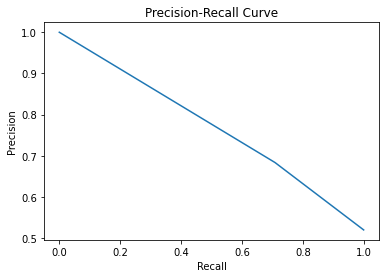

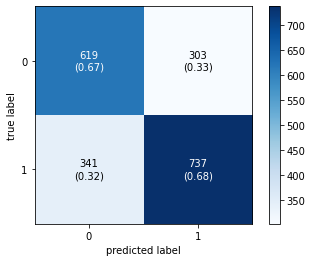

############################################################################




BernoulliNB

Train score of trained model: 50.5
Test score of trained model: 48.0
 
Accuracy : 0.48
Precision: 0.0
Recall   : nan
F1 score : nan
Specificity : 0.48

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.48      0.65      2000
           1       0.00      0.00      0.00         0

    accuracy                           0.48      2000
   macro avg       0.50      0.24      0.32      2000
weighted avg       1.00      0.48      0.65      2000





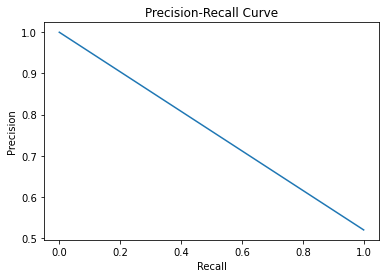

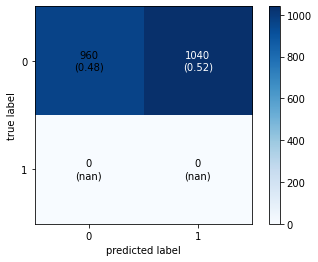

############################################################################




LinearDiscriminantAnalysis

Train score of trained model: 86.5625
Test score of trained model: 86.2
 
Accuracy : 0.862
Precision: 0.8221153846153846
Recall   : 0.9038054968287527
F1 score : 0.8610271903323263
Specificity : 0.8244781783681214

Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1054
           1       0.82      0.90      0.86       946

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000





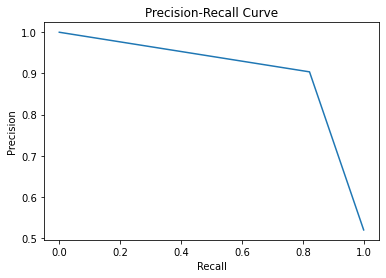

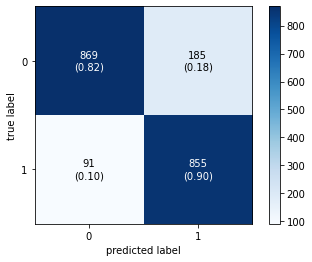

############################################################################




LogisticRegression

Train score of trained model: 68.3125
Test score of trained model: 66.75
 
Accuracy : 0.6675
Precision: 0.5711538461538461
Recall   : 0.7306273062730627
F1 score : 0.6411225040474905
Specificity : 0.624262847514743

Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.62      0.69      1187
           1       0.57      0.73      0.64       813

    accuracy                           0.67      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.69      0.67      0.67      2000





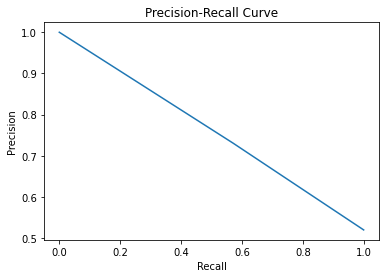

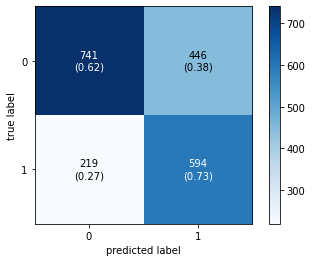

############################################################################




RandomForestClassifier

Train score of trained model: 100.0
Test score of trained model: 80.2
 
Accuracy : 0.802
Precision: 0.775
Recall   : 0.8326446280991735
F1 score : 0.8027888446215139
Specificity : 0.7732558139534884

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1032
           1       0.78      0.83      0.80       968

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000





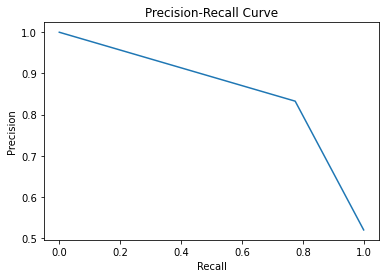

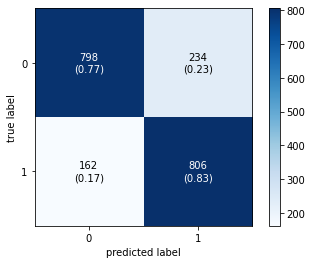

############################################################################




SupportVectorMachine

Train score of trained model: 89.9125
Test score of trained model: 87.05000000000001
 
Accuracy : 0.8705
Precision: 0.8240384615384615
Recall   : 0.9185423365487674
F1 score : 0.868727825646224
Specificity : 0.8284910965323337

Classification Report: 
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1067
           1       0.82      0.92      0.87       933

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.88      0.87      0.87      2000





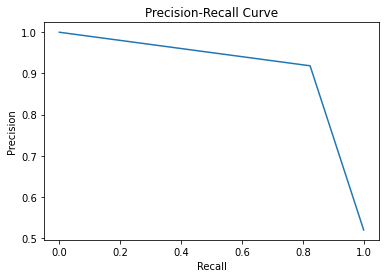

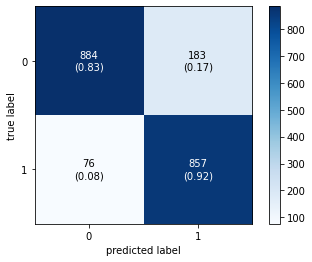

############################################################################




DecisionTreeClassifier

Train score of trained model: 100.0
Test score of trained model: 68.05
 
Accuracy : 0.6805
Precision: 0.6692307692307692
Recall   : 0.7023208879919274
F1 score : 0.6853766617429838
Specificity : 0.6590683845391476

Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.66      0.68      1009
           1       0.67      0.70      0.69       991

    accuracy                           0.68      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.68      0.68      0.68      2000





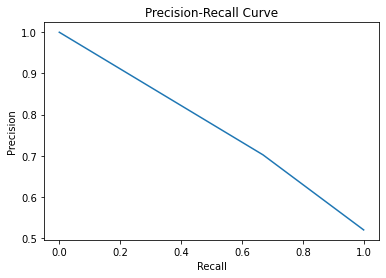

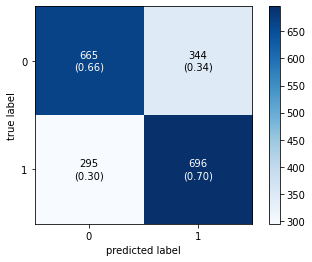

############################################################################




KNeighborsClassifier

Train score of trained model: 84.2
Test score of trained model: 76.64999999999999
 
Accuracy : 0.7665
Precision: 0.7163461538461539
Recall   : 0.8124318429661941
F1 score : 0.7613694430250383
Specificity : 0.7276084949215144

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.73      0.77      1083
           1       0.72      0.81      0.76       917

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000





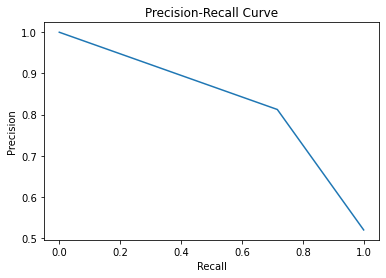

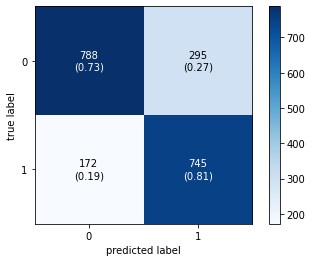

############################################################################




GradientBoostingClassifier

Train score of trained model: 86.46249999999999
Test score of trained model: 81.8
 
Accuracy : 0.818
Precision: 0.775
Recall   : 0.8611111111111112
F1 score : 0.8157894736842106
Specificity : 0.7800751879699248

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      1064
           1       0.78      0.86      0.82       936

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000





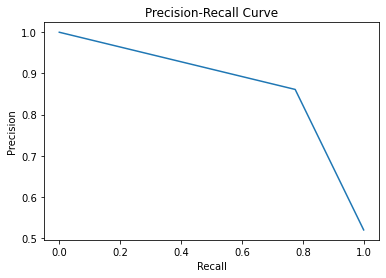

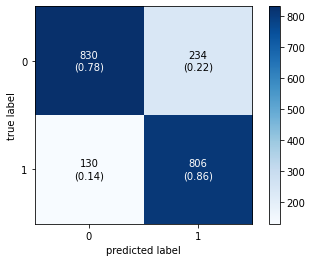

############################################################################




AdaBoostClassifier

Train score of trained model: 80.60000000000001
Test score of trained model: 79.9
 
Accuracy : 0.799
Precision: 0.7826923076923077
Recall   : 0.8222222222222222
F1 score : 0.8019704433497536
Specificity : 0.7762376237623763

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1010
           1       0.78      0.82      0.80       990

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000





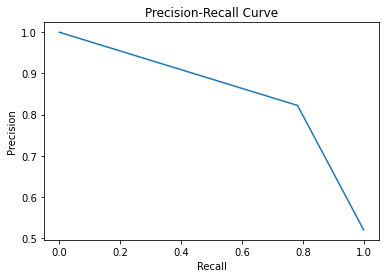

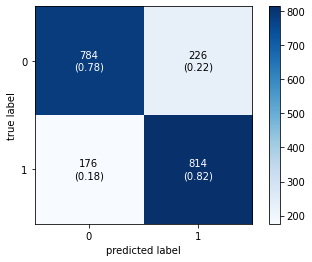

############################################################################




BaggingClassifier

Train score of trained model: 99.1125
Test score of trained model: 74.15
 
Accuracy : 0.7415
Precision: 0.676923076923077
Recall   : 0.7954802259887006
F1 score : 0.7314285714285715
Specificity : 0.6986547085201794

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.70      0.75      1115
           1       0.68      0.80      0.73       885

    accuracy                           0.74      2000
   macro avg       0.74      0.75      0.74      2000
weighted avg       0.75      0.74      0.74      2000





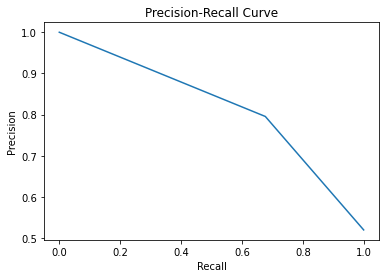

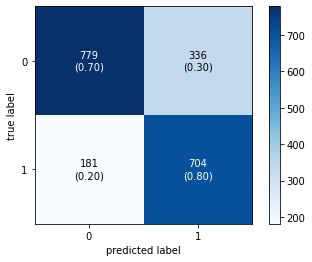

############################################################################




ExtraTreesClassifier

Train score of trained model: 100.0
Test score of trained model: 80.0
 
Accuracy : 0.8
Precision: 0.7509615384615385
Recall   : 0.8470715835140998
F1 score : 0.7961264016309888
Specificity : 0.7597402597402597

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1078
           1       0.75      0.85      0.80       922

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.81      0.80      0.80      2000





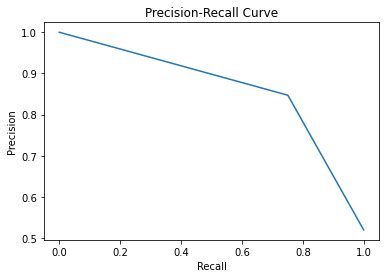

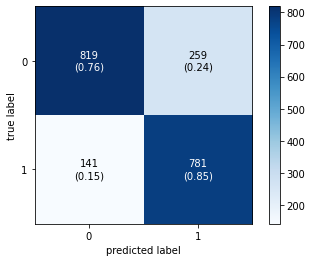

############################################################################




XGBClassifier

Train score of trained model: 90.55
Test score of trained model: 78.4
 
Accuracy : 0.784
Precision: 0.7701923076923077
Recall   : 0.8058350100603622
F1 score : 0.7876106194690267
Specificity : 0.7624254473161034

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1006
           1       0.77      0.81      0.79       994

    accuracy                           0.78      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.78      0.78      0.78      2000





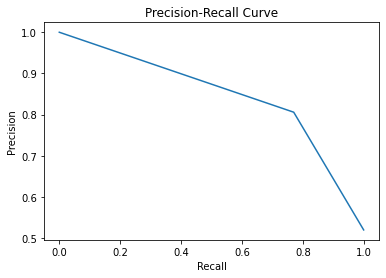

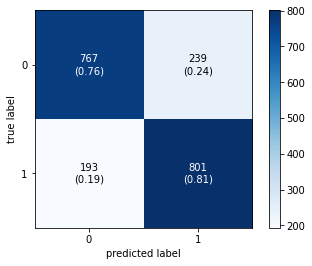

############################################################################




Stochastic Gradient Descent

Train score of trained model: 69.075
Test score of trained model: 68.0
 
Accuracy : 0.68
Precision: 0.6019230769230769
Recall   : 0.7347417840375586
F1 score : 0.6617336152219873
Specificity : 0.6393728222996515

Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.64      0.70      1148
           1       0.60      0.73      0.66       852

    accuracy                           0.68      2000
   macro avg       0.68      0.69      0.68      2000
weighted avg       0.70      0.68      0.68      2000





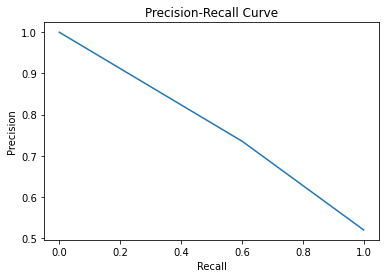

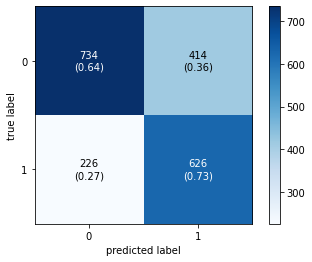

############################################################################




Neural Nets

Train score of trained model: 82.2625
Test score of trained model: 83.1
 
Accuracy : 0.831
Precision: 0.8028846153846154
Recall   : 0.862603305785124
F1 score : 0.8316733067729085
Specificity : 0.8013565891472868

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1032
           1       0.80      0.86      0.83       968

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000





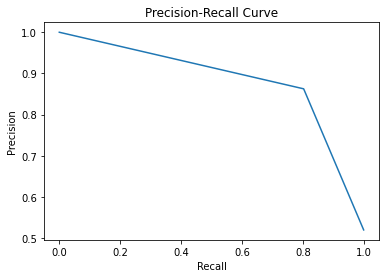

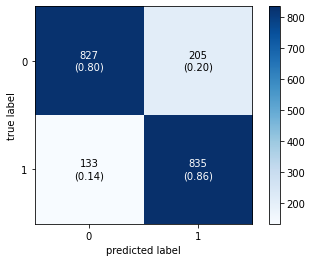

############################################################################





In [ ]:
models = {
    'GaussianNB': GaussianNB(),
    'BernoulliNB': BernoulliNB(),
    'LinearDiscriminantAnalysis':LinearDiscriminantAnalysis(),
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SupportVectorMachine': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'XGBClassifier': XGBClassifier(learning_rate= 1, max_depth= 5, n_estimators= 10),
    'Stochastic Gradient Descent':  SGDClassifier(max_iter=5000, random_state=0),
    'Neural Nets': MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1),
}

modelNames = ["GaussianNB", 'BernoulliNB', 'LinearDiscriminantAnalysis','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier', 'AdaBoostClassifier', 'BaggingClassifier','XGBClassifier',
              'ExtraTreesClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']

trainScores = []
validationScores = []
testScores = []

for m in models:
    model = models[m]
    model.fit(X_train, y_train)
#     score = model.score(X_valid, y_valid)

    print(f'\n{m}\n') 
    train_score = model.score(X_train, y_train)
    print(f'Train score of trained model: {train_score*100}')
    trainScores.append(train_score*100)

#     validation_score = model.score(X_valid, y_valid)
#     print(f'Validation score of trained model: {validation_score*100}')
#     validationScores.append(validation_score*100)

    test_score = model.score(X_test, y_test)
    print(f'Test score of trained model: {test_score*100}')
    testScores.append(test_score*100)
    print(" ")

    y_predictions = model.predict(X_test)
    cm = confusion_matrix(y_predictions, y_test)

    tn = cm[0,0]
    fp = cm[0,1]
    tp = cm[1,1]
    fn = cm[1,0]
    accuracy  = (tp + tn) / (tp + fp + tn + fn)
    precision = tp / (tp + fp)
    recall    = tp / (tp + fn)
    f1score  = 2 * precision * recall / (precision + recall)
    specificity = tn / (tn + fp)
    print(f'Accuracy : {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall   : {recall}')
    print(f'F1 score : {f1score}')
    print(f'Specificity : {specificity}')
    print("") 
    print(f'Classification Report: \n{classification_report(y_predictions, y_test)}\n')
    print("")
    
    precision, recall, thresholds = precision_recall_curve(y_test, y_predictions)
    plt.plot(recall, precision)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    
    # Plot non-normalized confusion matrix
    fig, ax = plot_confusion_matrix(conf_mat=cm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
    plt.show()

    for m in range (1):
        current = modelNames[m]
        modelNames.remove(modelNames[m])

    preds = model.predict(X_test)
    confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
    print("############################################################################")
    print("")
    print("")
    print("")

In [ ]:
modelNames

['GaussianNB',
 'LogisticRegression',
 'RandomForestClassifier',
 'SupportVectorMachine',
 'DecisionTreeClassifier',
 'KNeighborsClassifier',
 'GradientBoostingClassifier',
 'AdaBoostClassifier',
 'XGBClassifier',
 'Neural Nets']

In [ ]:


modelNames = ["GaussianNB", 'BernoulliNB', 'LinearDiscriminantAnalysis','LogisticRegression','RandomForestClassifier','SupportVectorMachine',
             'DecisionTreeClassifier', 'KNeighborsClassifier','GradientBoostingClassifier', 'AdaBoostClassifier', 'BaggingClassifier','XGBClassifier',
              'ExtraTreesClassifier',
             'Stochastic Gradient Descent', 'Neural Nets']

for i in range(len(modelNames)):
    print(f'Accuracy of {modelNames[i]} -----> {testScores[i]}')
     
     
import pandas as pd
data = {'Model': modelNames, 'Accuracy': testScores}  
result = pd.DataFrame(data)
result


Accuracy of GaussianNB -----> 67.80000000000001
Accuracy of BernoulliNB -----> 48.0
Accuracy of LinearDiscriminantAnalysis -----> 86.2
Accuracy of LogisticRegression -----> 66.75
Accuracy of RandomForestClassifier -----> 80.2
Accuracy of SupportVectorMachine -----> 87.05000000000001
Accuracy of DecisionTreeClassifier -----> 68.05
Accuracy of KNeighborsClassifier -----> 76.64999999999999
Accuracy of GradientBoostingClassifier -----> 81.8
Accuracy of AdaBoostClassifier -----> 79.9
Accuracy of BaggingClassifier -----> 74.15
Accuracy of XGBClassifier -----> 80.0
Accuracy of ExtraTreesClassifier -----> 78.4
Accuracy of Stochastic Gradient Descent -----> 68.0
Accuracy of Neural Nets -----> 83.1


,Model,Accuracy
0,GaussianNB,67.80
1,BernoulliNB,48.00
2,LinearDiscriminantAnalysis,86.20
3,LogisticRegression,66.75
4,RandomForestClassifier,80.20
5,SupportVectorMachine,87.05
6,DecisionTreeClassifier,68.05
7,KNeighborsClassifier,76.65
8,GradientBoostingClassifier,81.80
9,AdaBoostClassifier,79.90


In [ ]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], round(y[i], 3), ha = 'center',
                 bbox = dict(facecolor = 'gold', alpha =.9), weight='bold')

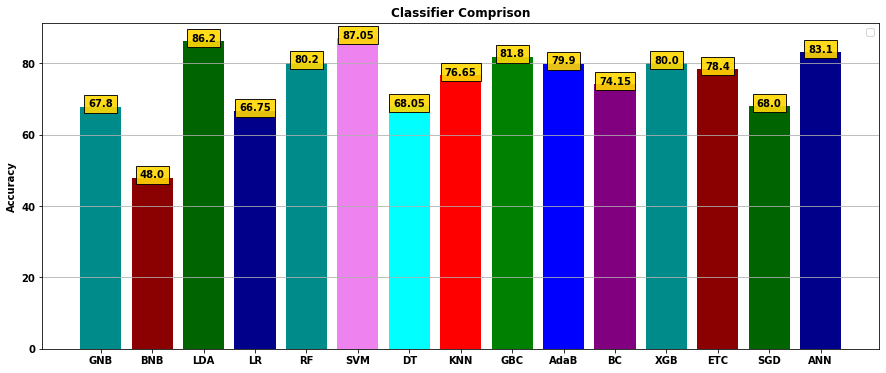

In [ ]:
Names = ["GNB", 'BNB', 'LDA','LR','RF','SVM',
             'DT', 'KNN','GBC', 'AdaB', 'BC','XGB',
              'ETC', 'SGD', 'ANN']
fig = plt.figure(figsize=(15,6))
plt.title("Classifier Comprison",fontweight='bold')
plt.ylabel("Accuracy", fontweight="bold")
plt.xticks(weight="bold")
plt.yticks(weight="bold")
plt.bar(Names, testScores, color=['darkcyan', 'darkred', 'darkgreen', 'darkblue', 'darkcyan', 'violet', 'cyan', 'red', 'green', 'blue', 'purple'])

plt.grid(axis='y')
addlabels(Names, testScores)
plt.legend()

### Select Best Model and Save

In [ ]:
best_model = result.Model.iloc[np.argmax(result.Accuracy)]
print(f'Best model is: {best_model}')
model = models[best_model]
model.fit(X_train, y_train)

Best model is: SupportVectorMachine


SVC()

In [ ]:
import pickle

filename = "/content/drive/MyDrive/Model_Image/final_model.pickle"

# save model
pickle.dump(model, open(filename, "wb"))

# load model
loaded_model = pickle.load(open(filename, "rb"))


In [ ]:
test_path = '9.jpg'
from PIL import Image

image = Image.open(test_path)
# Resize image
image = image.resize((128, 128))
feature = get_descriptors_extractor(image).reshape(1, -1)

y_pred = loaded_model.predict(feature)
if y_pred==0:
  print('Male')
else:
  print('Female')

Female
